# Library imports

In [1]:
# Data manipulation
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


# Colab
#from google.colab import drive

# System
import os

# Random number generation
import random

from keras._tf_keras.keras.preprocessing import image

> Mount Google Drive

In [2]:
#drive.mount('/content/drive')

# Data loading

In [3]:
# Current working directory
current_dir = os.getcwd()

# Parent directory
parent_dir = os.path.dirname(current_dir)

# Path to metadata CSV
metadata_path = os.path.join(parent_dir, 'data\\species_metadata.csv')

# Load the metadata
df = pd.read_csv(metadata_path)

# Display the first few rows of the dataframe
df.head()

rare_species_id  eol_content_id  eol_page_id  \
0  75fd91cb-2881-41cd-88e6-de451e8b60e2        12853737       449393   
1  28c508bc-63ff-4e60-9c8f-1934367e1528        20969394       793083   
2  00372441-588c-4af8-9665-29bee20822c0        28895411       319982   
3  29cc6040-6af2-49ee-86ec-ab7d89793828        29658536     45510188   
4  94004bff-3a33-4758-8125-bf72e6e57eab        21252576      7250886   

    kingdom    phylum            family  \
0  animalia  mollusca         unionidae   
1  animalia  chordata       geoemydidae   
2  animalia  chordata  cryptobranchidae   
3  animalia  chordata          turdidae   
4  animalia  chordata         indriidae   

                                           file_path  
0  mollusca_unionidae/12853737_449393_eol-full-si...  
1  chordata_geoemydidae/20969394_793083_eol-full-...  
2  chordata_cryptobranchidae/28895411_319982_eol-...  
3  chordata_turdidae/29658536_45510188_eol-full-s...  
4  chordata_indriidae/21252576_7250886_eol-full-s...

# Data exploration

In [4]:
# Count samples per family
class_counts = df['family'].value_counts()

# Most and least common families
print(f"Most common family: {class_counts.index[0]} ({class_counts.iloc[0]} samples)")
print(f"Least common family: {class_counts.index[-1]} ({class_counts.iloc[-1]} samples)")

# Imbalance analysis
print(f"\nImbalance ratio: {class_counts.iloc[0]/class_counts.iloc[-1]:.1f}x")

# Display the number of unique families and phila
print(f"\nThere are {len(class_counts)} unique families and {len(df['phylum'].unique())} unique phyla in the dataset and a total of {len(df)} samples")

Most common family: dactyloidae (300 samples)
Least common family: siluridae (29 samples)

Imbalance ratio: 10.3x

There are 202 unique families and 5 unique phyla in the dataset and a total of 11983 samples


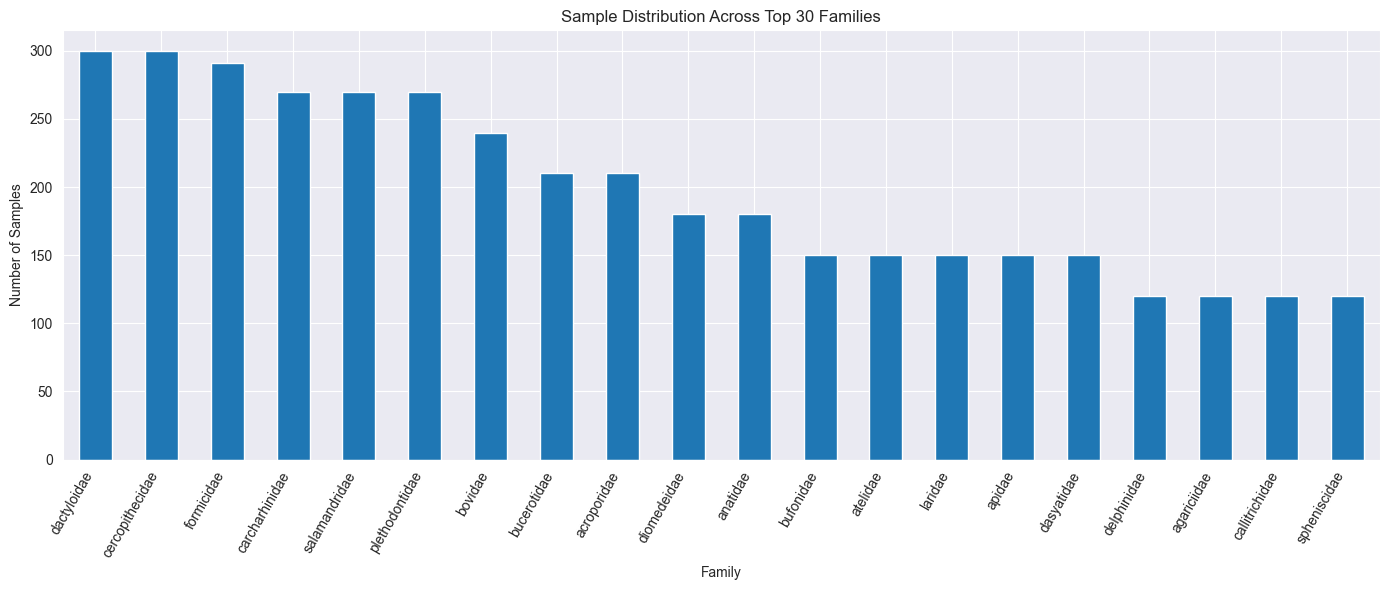

In [5]:
# Plot distribution
plt.figure(figsize=(14, 6))
class_counts[:20].plot(kind='bar')
plt.title('Sample Distribution Across Top 30 Families')
plt.ylabel('Number of Samples')
plt.xlabel('Family')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

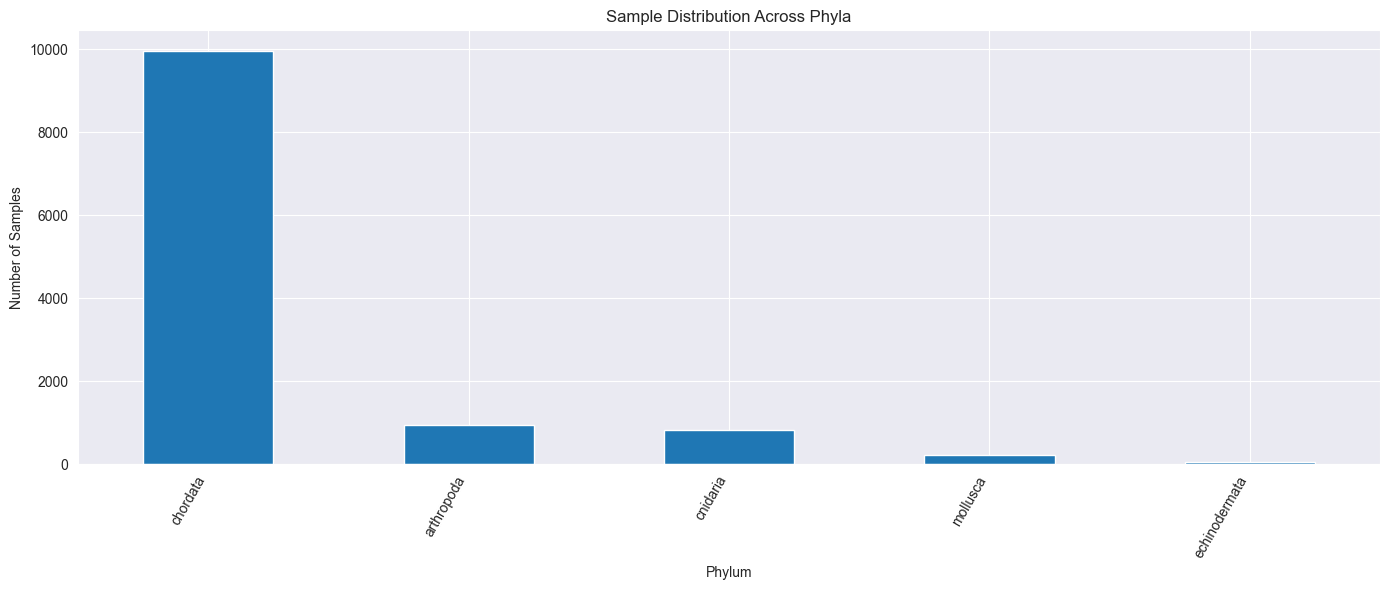

In [6]:
# Count samples per phylum
class_counts = df['phylum'].value_counts()

# Plot distribution
plt.figure(figsize=(14, 6))
class_counts.plot(kind='bar')
plt.title('Sample Distribution Across Phyla')
plt.ylabel('Number of Samples')
plt.xlabel('Phylum')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

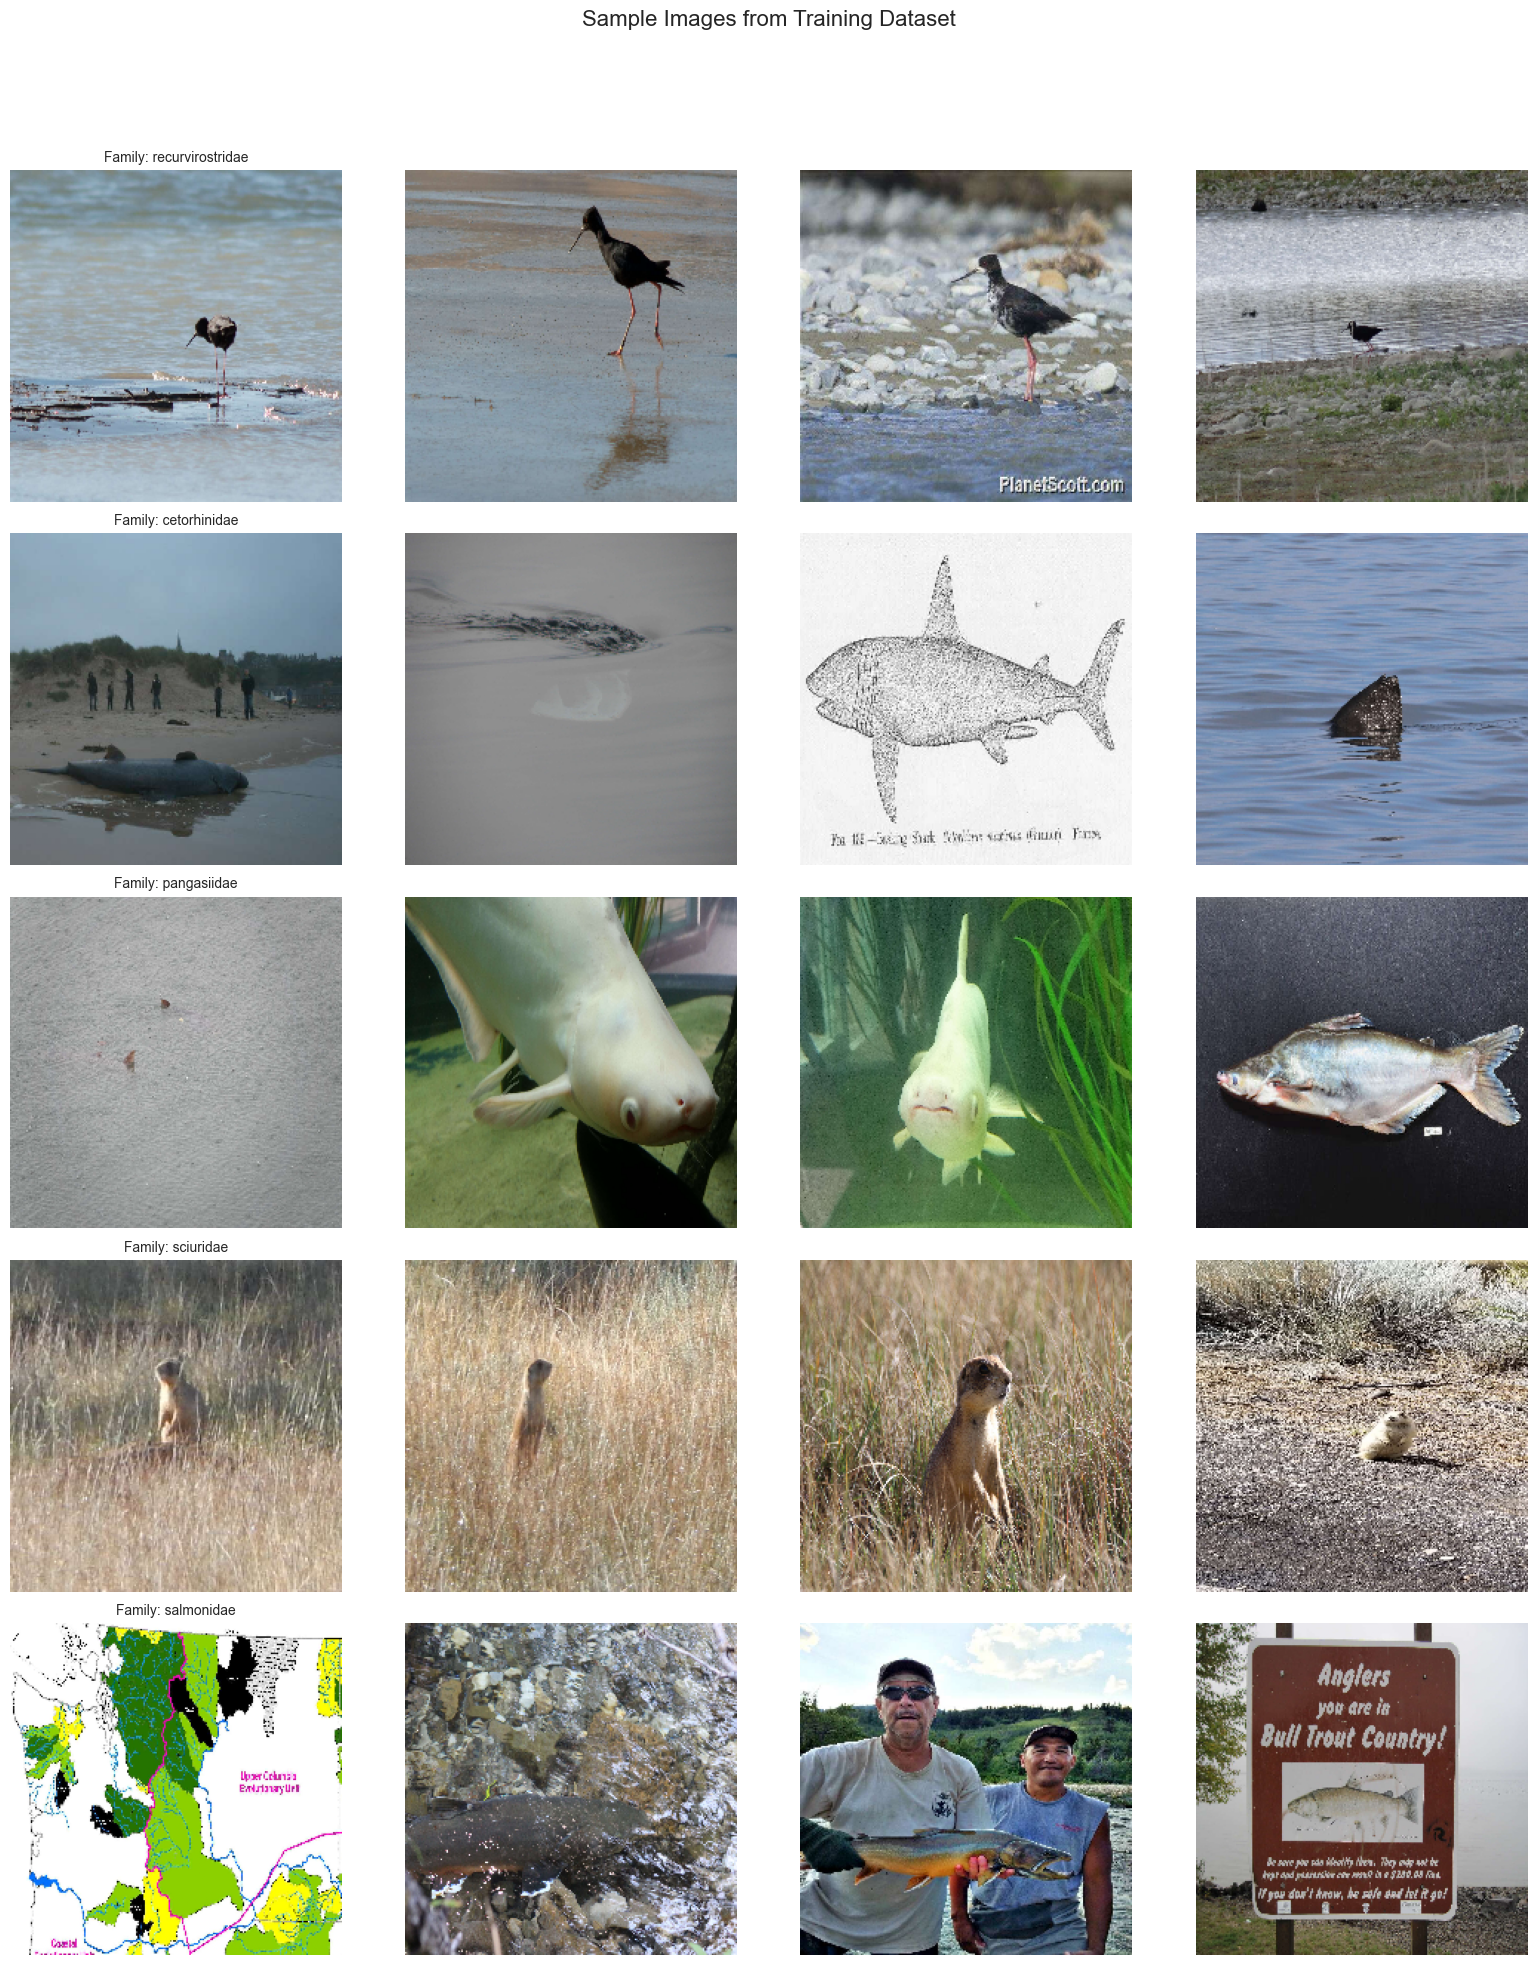

In [13]:
# Training directory path
train_dir = os.path.join(os.path.dirname(parent_dir), 'train')

# Function to load and display a grid of sample images
def visualize_training_samples(train_dir, num_classes=5, samples_per_class=3):
    # Get list of class directories
    class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

    # If there are too many classes, randomly sample some
    if len(class_dirs) > num_classes:
        class_dirs = random.sample(class_dirs, num_classes)
    else:
        num_classes = len(class_dirs)

    plt.figure(figsize=(4*samples_per_class, 4*num_classes))

    for i, class_dir in enumerate(class_dirs):
        class_path = os.path.join(train_dir, class_dir)
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # If there are too many images, randomly sample some
        if len(image_files) > samples_per_class:
            image_files = random.sample(image_files, samples_per_class)
        else:
            samples_per_class_actual = len(image_files)

        # Display images for this class
        for j, img_file in enumerate(image_files):
            img_path = os.path.join(class_path, img_file)

            # Load and display the image
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img) / 255.0  # Normalize to [0,1]

            plt.subplot(num_classes, samples_per_class, i*samples_per_class + j + 1)
            plt.imshow(img_array)
            if j == 0:  # Only show class name for the first image in each row
                plt.title(f'Family: {class_dir}', fontsize=10)
            plt.axis('off')

    plt.tight_layout()
    plt.suptitle('Sample Images from Training Dataset', fontsize=16)
    plt.subplots_adjust(top=0.9)  # Make room for suptitle
    plt.show()


# Display images from randomly selected classes
visualize_training_samples(train_dir, num_classes=5, samples_per_class=4)